In [1]:
%matplotlib inline

## 2.4 Statistical Decision Theory

### Expected prediction error (EPE)

We define the following elements:
- Features $X\in\mathbb{R}^p$ a random variable
- Output $Y\in\mathbb{R}$ a random variable
- Prediction function $f$, such that $\hat{Y}=f\left(X\right)$
- Loss function $L$, the squared error such that, $L\left(Y,f\left(X\right)\right)=\left(Y-f\left(X\right)\right)^2$

The aim is to find $f$ to minimize the $EPE$.

The expected prediction error is defined as,

$$EPE\left(f\right)=E_{X,Y}\left[L\left(Y,f\left(X\right)\right)\right]$$

In case of squared error loss function,

$$EPE\left(f\right)=E_{X,Y}\left[\left(Y-f\left(X\right)\right)^2\right] \tag {2.9}$$

Expected value in integral form with $f_{X,Y}$ the joint distribution pdf of $(X,Y)$,

$$EPE\left(f\right)=\int_{\mathcal{D}_x}\int_{\mathcal{D}_y}{\left(Y-f\left(X\right)\right)^2f_{X,Y}\left(x,y\right)dxdy} \tag{2.10}$$

By using the definition of conditional probability,

$EPE\left(f\right)=\int_{\mathcal{D}_x}\int_{\mathcal{D}_y}\left(Y-f\left(X\right)\right)^2f_{Y|X}\left(y|x\right)f_X\left(x\right)dxdy=\int_{\mathcal{D}_x}\ E_{Y|X}\left[\left(Y-f\left(X\right)\right)^2|X\right]f_X\left(x\right)dx$

Therefore the $EPE$ can be write as,

$$EPE\left(f\right)=E_X\left[E_{Y|X}\left[\left(Y-f\left(X\right)\right)^2|X\right]\right]$$

Then, to minimize the $EPE$ if the $X$ random variable is fixed we define $f$ for each $x\in\mathbb{R}$ such that,

$$f\left(x\right)=\underset{c\in\mathcal{D}_y}{argmin}E_{Y|X}\left[\left(Y-c\right)^2|X=x\right] \tag{2.12}$$

$c\longmapsto\left(Y-c\right)^2$ is a convex function then the value of $c$ that minimizes the $EPE$ respects,

$\Longleftrightarrow\frac{d}{dc}E_{Y|X}\left[\left(Y-c\right)^2|X=x\right]=0$

$\Longleftrightarrow\int_{\mathcal{D}_y}{{\frac{d}{dc}\left(y-c\right)}^2f_{Y|X}\left(Y|X=x\right)dy=0}$ because the bounds of the integral are constant

$\Longleftrightarrow\int_{\mathcal{D}_y}{f_{Y|X}\left(Y|X=x\right)2\left(c-y\right)dy=0}$

$\Longleftrightarrow\ c\int_{\mathcal{D}_y}{f_{Y|X}\left(Y|X=x\right)dy}-\int_{\mathcal{D}_y}{f_{Y|X}\left(Y|X=x\right)ydy=0}$

$\Longleftrightarrow\ c=\int_{\mathcal{D}_y}{yf_{Y|X}\left(Y|X=x\right)dy}$

Therefore, for each $x\in\mathbb{R}$,

$$f\left(x\right)=E\left[Y\middle| X=x\right] \tag {2.13}$$

This solution is called the <strong>regression function</strong>.

### How nearest-neighbor fit to EPE?

k-NN directly approximates the equation (2.13), as (2.8) could be rewrite such as,

$$\hat{f}\left(x\right)=Mean\left(y_i|x_i\in N_k\left(x\right)\right)$$

In addition, if $P[X,Y]$ respects the mild regularity condition then for $N,k\rightarrow\infty$ and $N/k\rightarrow0$ we have,

$$\hat{f}\left(x\right)\rightarrow\ E\left[Y|X=x\right]$$

But:
- In reality, $N\rightarrow\infty$ does not exist. 
- Even if we have numerous observations, in high dimension, the nearest neighbors will be probably far from the target point, which could result in large errors.
-  If a structure model is appropriate we can have more stable estimate.

### EPE solution if the loss function is the absolute difference

Same framework as 2.4.1 expect that the loss function $L$ is the aboslute difference such that,
$L\left(X,f\left(X\right)\right)=\left|X-f\left(X\right)\right|$

$$EPE\left(f\right)=E_{Y|X}\left[abs\left(X-f\left(X\right)\right)|\ X\right]\ $$

For each $x\in\mathbb{R}$, $f$ minimizes pointwise the $EPE$ such that,

$$f\left(x\right)=argmin_cE_{Y|X}\left[abs\left(Y-c\right)|X=x\right]$$

$c\longmapsto\ abs\left(c-Y\right)$ is a convex function then the value of $c$ that minimizes the $EPE$ respects,

$\Longleftrightarrow\frac{d}{dc}E_{Y|X}\left[abs\left(Y-c\right)|X=x\right]=0$

$\Longleftrightarrow\int_{-\infty}^{+\infty}{\frac{d}{dc}\left|y-c\right|{pdf}_{Y|X}\left(y\right)dy}=0$

$\Longleftrightarrow\int_{-\infty}^{+\infty}{\frac{y-c}{\left|y-c\right|}f_{Y|X}\left(y\right)dy}=0$

$\Longleftrightarrow-\int_{-\infty}^{c}{f_{Y|X}\left(y\right)dy}+\int_{c}^{+\infty}{f_{Y|X}\left(y\right)dy}=0$

$\Longleftrightarrow \int_{-\infty}^{c}{f_{Y|X}\left(y\right)dy}=\int_{c}^{+\infty}{f_{Y|X}\left(y\right)dy}$

$\Longleftrightarrow F_{Y|X}\left(c\right)=1-F_{Y|X}\left(c\right)$

$\Longleftrightarrow F_{Y|X}\left(c\right)=\frac{1}{2}$

Therefore, for each $x\in\mathbb{R}$,

$$f\left(x\right)=median\left(Y|X=x\right) \tag{2.18}$$

### EPE if the output is categorial

We define the following elements:
- Features $X\in\mathbb{R}^p$ a random variable
- Output $G\in\mathcal{G}$ a random variable with $\mathcal{G}$ the set of possible classes (i.e. a discontinuous set) and $card\left(\mathcal{G}\right)=K$
- Prediction function $G$
- Loss function $L$ such that, $L(i,j)=\begin{cases} L(i,j)\in \mathbb{R}_+, & i \neq j\\ 0, & \text{otherwise} \end{cases}$

$EPE=E_{X,G}\left[L\left(G,G\left(X\right)\right)\right]$

$EPE=\sum_{k=1}^{K}{L\left(\mathcal{G}_k ,G\left(X\right)\right)P\left[G_k,X\right]}$

$EPE=\sum_{k=1}^{K}L\left(\mathcal{G}_k ,G\left(X\right)\right)P\left[G_k|X\right]P\left[X\right]$

$EPE=\sum_{k=1}^{K}L\left(\mathcal{G}_k ,G\left(X\right)\right)P\left[G_k|X\right]$

The function $G$ is defined pointwise such that for each $G\in\mathcal{G}$,

$$G\left(X\right)=\underset{g\in\mathcal{G}}{argmin}{\sum_{k=1}^{K}L\left(\mathcal{G}_k ,c\right)P\left[G_k|X=x\right]}$$

$\Longleftrightarrow G\left(X\right)=\underset{g\in\mathcal{G}}{argmin}{\sum_{k=1}^{K}\left(1-1_{\mathcal{G}_k=c}\right)P\left[\mathcal{G}_k |X=x\right]}$ because $1_{i\neq j}=1-1_{i=j}$

$\Longleftrightarrow G\left(X\right)=\underset{g\in\mathcal{G}}{argmin}{\left\{\sum_{k=1}^{K}P\left[\mathcal{G}_k|X=x\right]-\sum_{k=1}^{K}{1_{G_k=c}P\left[\mathcal{G}_k|X=x\right]}\right\}}$

$\Longleftrightarrow G\left(X\right)=\underset{g\in\mathcal{G}}{argmin}{\left\{1-P\left[c|X=x\right]\right\}}$

$\Longleftrightarrow G\left(x\right)=\mathcal{G}_k$ if $P\left[\mathcal{G}_k|X=x\right]=\underset{g\in\mathcal{G}}{max}P\left[g|X=x\right]$

Therefore, we classify to the most probable class using the conditional distribution $G|X$.

This solution is known as Bayes classifier. This classifier is optimal as it produces the lowest error rate among all the other classifiers. Unfortunately, in reality the condition distribution $G|X$ is unknown, so computing the Bayes classifier is impossible.

The classifiers try to approximate this conditional proability as k-nearest neighbor with a direct approximation.

#### Example: Bayes classifier

##### Data

In [2]:
import numpy as np
import numpy.random as rand
from scipy.stats import multivariate_normal as multi_normal

In [3]:
# We use the function defined in section 2.3 with a slight
# modification to return the mean of the two classes.
def generate_data(sample_size: int) -> tuple:

    # Parameters for mean gaussian distribution
    mean_expected_blue = [0.5,0]
    mean_expected_orange = [0,0.5]
    mean_cov = np.eye(2)
    
    # Generate 10 means for blue class and orange class
    nb_real = 10
    sample_blue_mean = rand.multivariate_normal(mean_expected_blue,
                                                mean_cov, nb_real)
    sample_orange_mean = rand.multivariate_normal(mean_expected_orange,
                                                  mean_cov, nb_real)
    
    # Covariance for data gaussian distribution
    data_cov = np.eye(2)/5
    
    # Function that generates an observation for the blue class
    x_blue = lambda : rand.multivariate_normal(sample_blue_mean[rand.randint(0, 9)],
                                               data_cov)
    # Function that generates an observation for the orange class
    x_orange = lambda : rand.multivariate_normal(sample_orange_mean[rand.randint(0, 9)],
                                                 data_cov)
    # Generate the sample X
    X = np.array([
        np.vstack((x_blue(), x_orange()))
        for _ in range(int(sample_size/2))
    ])
    
    X = X.reshape(sample_size, 2)
  
    # Generate the sample y
    y = np.empty((sample_size,))
    y[::2] = 0
    y[1::2] = 1
    
    return (X, y, sample_blue_mean, sample_orange_mean)

In [4]:
# Generate data
sample_size = 200
X, y, blue_mean, orange_mean = generate_data(sample_size)
X_blue = X[y == 0, :]
X_orange = X[y == 1, :]

##### Conditional distribution

In [5]:
# Pdf of the two classes as defined in section 2.2
def pdf_data(x: np.ndarray, mean: np.ndarray) ->np.array: 
    return np.mean([multi_normal.pdf(x, mean=m, cov=np.eye(2)/5)
                    for m in mean], axis=0)

##### Plot results

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Plot the data
def plot_data(x_blue: np.ndarray, x_orange:np.ndarray):
    
    fig, ax = plt.subplots(1, figsize=(5, 3.5))
    
    ax.scatter(x_blue[:, 0], x_blue[:, 1], marker='o', s=20,
               linewidth=0.8, facecolors='none', edgecolors='blue')
    ax.scatter(x_orange[:, 0], x_orange[:, 1], marker='o', s=20,
               linewidth=0.8, facecolors='none', edgecolors='orange')
    ax.plot()
    
    return ax

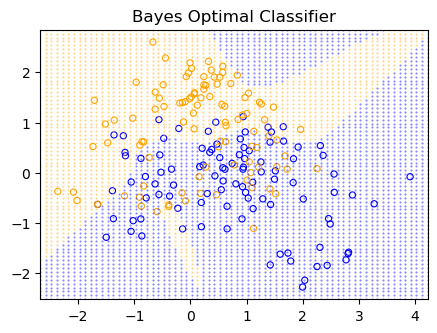

In [8]:
ax = plot_data(X_blue, X_orange)

# get the x and y limits of the axis
x1_min, x1_max = ax.get_xlim()
x2_min, x2_max = ax.get_ylim()

# set the number of points in the grid
nb_point_ax = 70

# create a grid of points covering the axis limits
grid = np.array([[i,j] 
                 for i in np.linspace(x1_min, x1_max, nb_point_ax)
                 for j in np.linspace(x2_min, x2_max, nb_point_ax)])

# Classify each point in the grid as belonging to the orange or blue class
# by comparing the probability density at that point.
y_grid_pred = pdf_data(grid, orange_mean) > pdf_data(grid, blue_mean)
y_grid_pred = y_grid_pred.astype(int)

# Separate the points in the grid by class
grid_blue = grid[y_grid_pred==0]
grid_orange = grid[y_grid_pred==1]

# Plot the points in the grid as a scatter plot
ax.scatter(grid_blue[:, 0], grid_blue[:, 1], marker='.',
           color='blue', alpha=0.5, s=1)
ax.scatter(grid_orange[:, 0], grid_orange[:, 1], marker='.',
           color='orange', alpha=0.5, s=1)

# Reset the axis limits
ax.set_xlim(x1_min, x1_max)
ax.set_ylim(x2_min, x2_max)

ax.set_title("Bayes Optimal Classifier")

plt.show()